<a href="https://colab.research.google.com/github/MargoRita99/Machine-Learning/blob/main/%D0%9B%D0%A0_6_%D0%9C%D0%B0%D0%BA%D0%B0%D1%80%D0%BE%D0%B2%D0%B0_%D0%91%D0%98%D0%92%D0%A2_22_%D0%A1%D0%9F_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Кластеризация
**Цель работы**  
Освоить на практике основные приемы работы с самыми распространенными алгоритмами кластеризации.  

**Содержание работы**  
Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.
Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.
Визуализируйте результат кластеризации. Выведите центры кластеров.
Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.
Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?
Нормализуйте датасет и повторите кластеризацию.
Постройте для наглядности кластеризацию только по двум признакам.
Постройте на том же датасете иерархическую кластеризацию.
Постройте на этих же данных кластеризацию методом DBSCAN.

Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.

In [ ]:
url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv'
df = pd.read_csv(url, index_col=0)
df.head()

,CustomerID,Genre,Age,Income,Score
0,1,Male,19,15000,0.39
1,2,Male,21,15000,0.81
2,3,Female,20,16000,0.06
3,4,Female,23,16000,0.77
4,5,Female,31,17000,0.40


<Axes: xlabel='Income', ylabel='Score'>

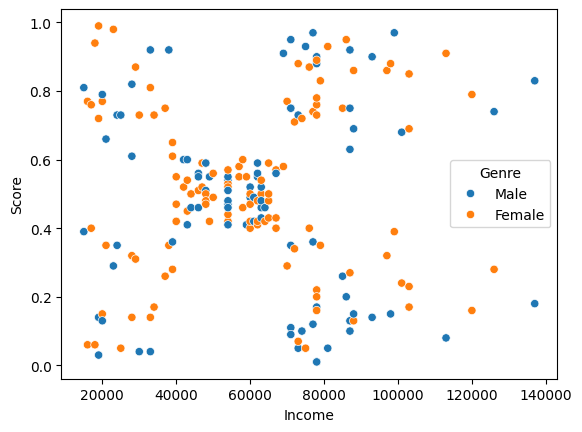

In [ ]:
import seaborn as sns

sns.scatterplot(x='Income' , y='Score',data=df , hue='Genre')

In [ ]:
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.

In [ ]:
from sklearn.cluster import KMeans

k_means = KMeans(n_clusters=3, random_state=42).fit(X)

In [ ]:
y_kmeans = k_means.labels_

In [ ]:
print(k_means)

KMeans(n_clusters=3, random_state=42)


Визуализируйте результат кластеризации. Выведите центры кластеров.

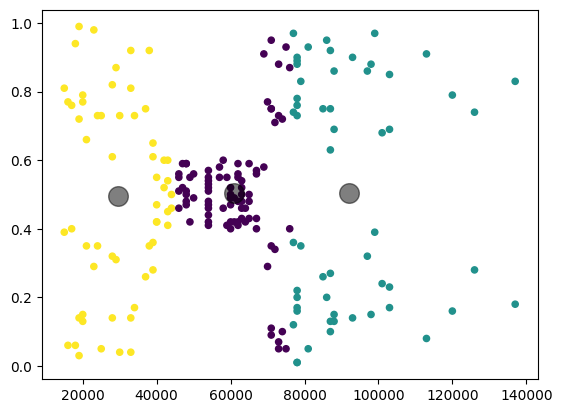

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.

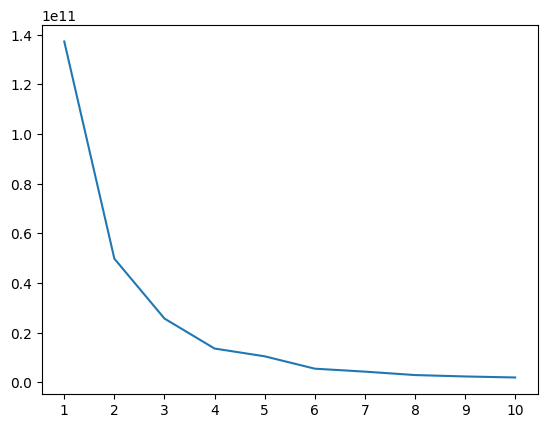

In [ ]:
wcss = []
for i in range(1,11):
	k_means = KMeans(n_clusters=i,random_state=42)
	k_means.fit(X)
	wcss.append(k_means.inertia_)
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
_ = plt.show()

Мы видим очень типичную картину: чем больше кластеров, тем меньше значение метрики WSCC. Но в начале она падает очень быстро, а при дальнейшем увеличении количества - начинает все больше выравниваться. Наша задача найти "излом" на этой кривой, то есть такое значение, после которого метрика продолжает падает уже значительно медленнее.

В данном случае, можно видеть, что 4 кажется неплохим выбором.

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X)

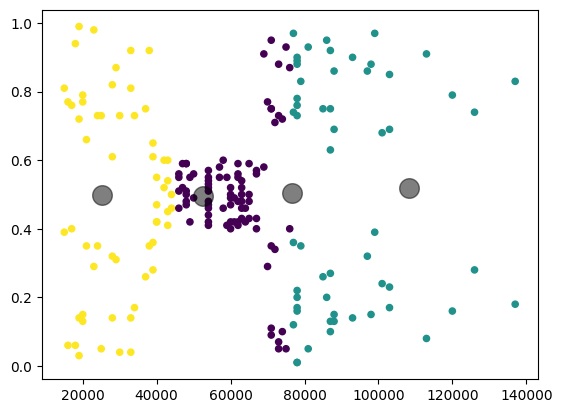

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?

In [ ]:
k_means = KMeans(n_clusters=8, random_state=42).fit(X)

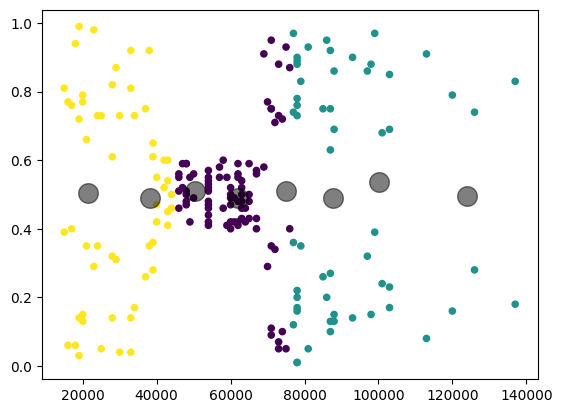

In [ ]:
plt.scatter(x.Income, x.Score, c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 1], centers[:, 2], c='black', s=200, alpha=0.5)

Центры кластеров подозрительно всегда располагаются вдоль одной оси. И это не кажется оптимальным, когда мы смотрим на общее расположение точек. Если вы видите такое поведение, когда странное поведение выражается вдоль определенной оси, это должно вас навести на мысль о том, что что-то не так с масштабом.

И действительно, если мы взглянем на подписи осей, станет очевидным, что горизонтальная ось выражена в десятках тысяч, а вертикальная - в долях единицы. У нас типично ненормализованные данные.

Нормализуйте датасет и повторите кластеризацию.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()

,Age,Income,Score,Genre_Female,Genre_Male
0,-1.424569,-1.738999,-0.434801,-1.128152,1.128152
1,-1.281035,-1.738999,1.195704,-1.128152,1.128152
2,-1.352802,-1.700830,-1.715913,0.886405,-0.886405
3,-1.137502,-1.700830,1.040418,0.886405,-0.886405
4,-0.563369,-1.662660,-0.395980,0.886405,-0.886405


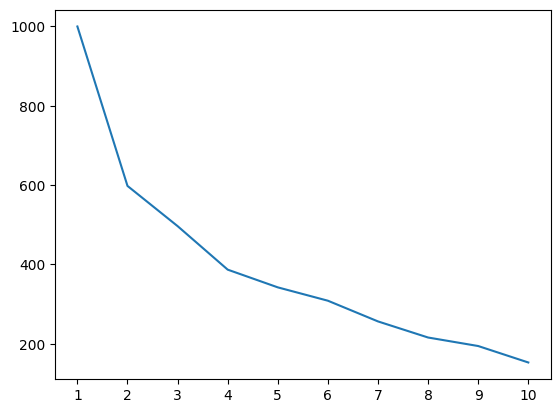

In [ ]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_scaled).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

Теперь WCSS измеряется всего в сотнях.

In [ ]:
k_means = KMeans(n_clusters=4, random_state=42).fit(X_scaled)

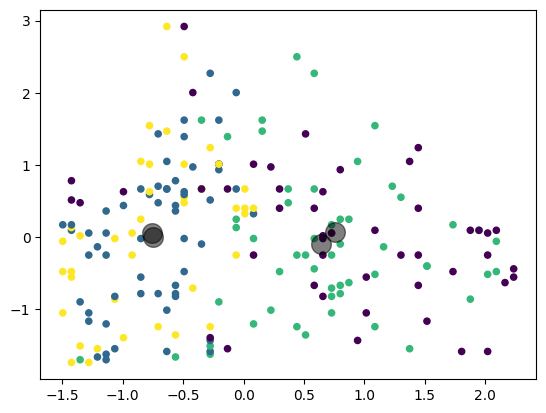

In [ ]:
y_kmeans = k_means.labels_
plt.scatter(X_scaled.iloc[:, 0], X_scaled.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Постройте для наглядности кластеризацию только по двум признакам.

In [ ]:
X_flat = X_scaled.drop(["Age", "Genre_Female", "Genre_Male"], axis=1)
X_flat.head()

,Income,Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


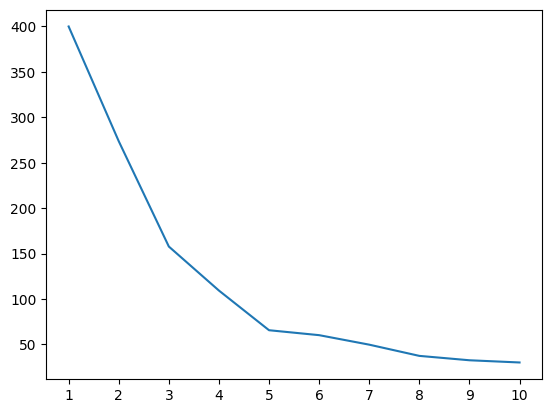

In [ ]:
scaled = []
for i in range(1,11):
	scaled.append(KMeans(n_clusters=i,random_state=42).fit(X_flat).inertia_)
plt.plot(range(1,11),scaled)
plt.xticks(range(1,11))
_ = plt.show()

Мы видим, что довольно отчетливо оптимальное количество кластеров уже 5, а не 4 как ранее.

In [ ]:
k_means = KMeans(n_clusters=5, random_state=42).fit(X_flat)

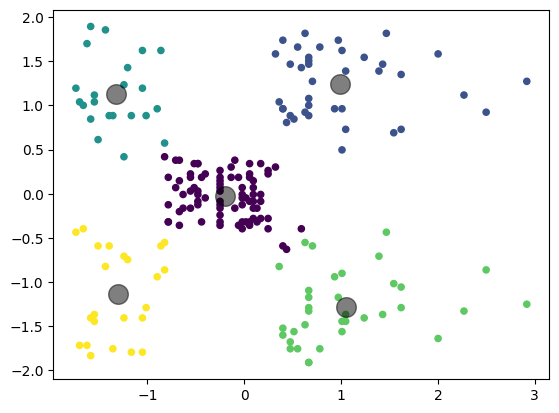

In [ ]:
y_kmeans = k_means.labels_
plt.scatter(X_flat.iloc[:, 0], X_flat.iloc[:, 1], c=y_kmeans, s=20, cmap='viridis')
centers = k_means.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

Иерархическая кластеризация

In [ ]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X_scaled)

In [ ]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    dendrogram(linkage_matrix, **kwargs)

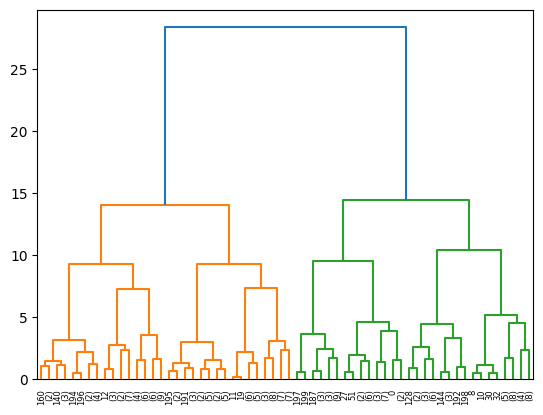

In [ ]:
plot_dendrogram(model, truncate_mode="level", p=5)

По вертикали на нем отложена мера расстояния между объектами или кластерами. По горизонтали - объекты датасета. Соответственно, на уровне самих объектов расстояние между ними равно нулю (расстояние от объекта до самого себя). Ближайшие объекты объединяются в группу, что отражается на дендрограмме характерной формой с перемычкой на том вертикальном уровне, который соответствует расстоянию между объектами. Затем эти группы объединяются между собой, и так до тех пор, пока вся выборка не будет объединена.

Соответственно, интерес представляет именно порядок, в котором разные объекты будут объединяться. Чем две точки выборки дальше друг от друга, тем позже они попадут в один кластер, и тем выше на дендрограмме будет это объединение.

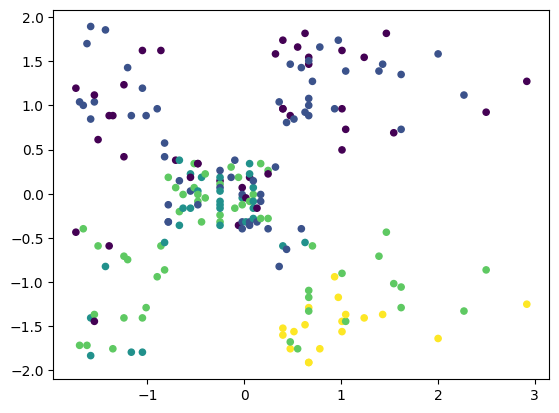

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=5).fit(X_scaled)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

Для наглядности, обучим этот алгоритм на плоских данных, чтобы показать визуально, как он объединяет точки на плоскости.

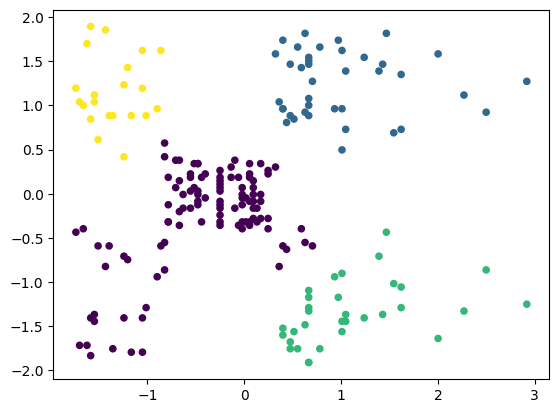

In [ ]:
agg_clustering = AgglomerativeClustering(n_clusters=4).fit(X_flat)
y_agg = agg_clustering.labels_

plt.scatter(X_flat.Income, X_flat.Score, c=y_agg, s=20, cmap='viridis')

Постройте на этих же данных кластеризацию методом DBSCAN.

Еще один алгоритм кластеризации, который необходимо разобрать на практике, потому, что он использует совершенно другой подход - DBSCAN. Он оценивает плотность расположения точек в окрестностях заданной.

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

In [ ]:
n_clusters_ = len(set(y_db)) - (1 if -1 in y_db else 0)
n_noise_ = list(y_db).count(-1)

Дело в том, что алгоритм DBSCAN в sklearn использует значение "-1" как метку, показывающую, что данная точка отнесена к шуму. Теперь мы можем построить график зависимости количества кластеров и шума в зависимости от значения гиперпараметра eps:

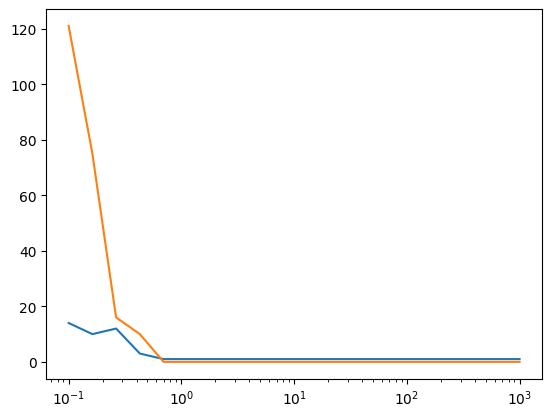

In [ ]:
clusters, noise = [], []
for i in np.logspace(-1, 3, 20):
  db = DBSCAN(eps=i, min_samples=3).fit(X_flat)
  y_db = db.labels_

  clusters.append(len(set(y_db)) - (1 if -1 in y_db else 0))
  noise.append(list(y_db).count(-1))

plt.plot(np.logspace(-1, 3, 20),clusters)
plt.plot(np.logspace(-1, 3, 20),noise)
plt.xscale('log')
_ = plt.show()

Он показывает, что чем больше радиус, тем меньше и кластеров и шума получается.

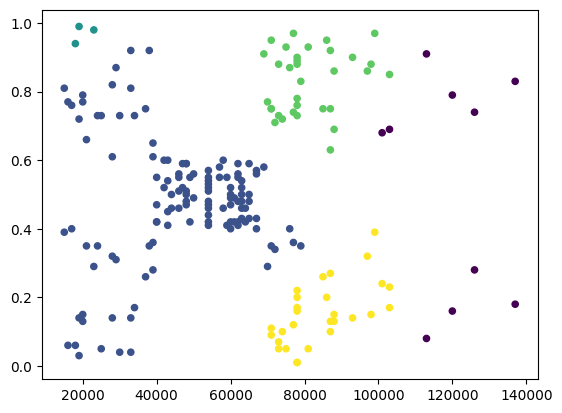

In [ ]:
db = DBSCAN(eps=0.4, min_samples=3).fit(X_flat)
y_db = db.labels_

plt.scatter(X.Income, X.Score, c=y_db, s=20, cmap='viridis')

**Задания для самостоятельного выполнения**

Для придания смысла кластерам выведите примеры точек выборки для каждого кластера. Сделайте вывод, чем они отличаются.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv'
df = pd.read_csv(url, index_col=0)

x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
df['cluster'] = y_kmeans

for cluster_num in range(5):
    print(f"Кластер {cluster_num}:")
    print(df[df['cluster'] == cluster_num].head()[['Age', 'Genre', 'Income', 'Score']])
    print()
print(df.groupby('cluster')[['Age', 'Income', 'Score']].mean())
print(df.groupby('cluster')['Genre'].value_counts(normalize=True))


Кластер 0:
    Age Genre  Income  Score
8    64  Male   19000   0.03
10   67  Male   19000   0.14
14   37  Male   20000   0.13
18   52  Male   23000   0.29
30   60  Male   30000   0.04

Кластер 1:
    Age   Genre  Income  Score
3    23  Female   16000   0.77
5    22  Female   17000   0.76
7    23  Female   18000   0.94
9    30  Female   19000   0.72
11   35  Female   19000   0.99

Кластер 2:
    Age   Genre  Income  Score
2    20  Female   16000   0.06
4    31  Female   17000   0.40
6    35  Female   18000   0.06
12   58  Female   20000   0.15
16   35  Female   21000   0.35

Кластер 3:
     Age Genre  Income  Score
123   39  Male   69000   0.91
127   40  Male   71000   0.95
129   38  Male   71000   0.75
131   39  Male   71000   0.75
137   32  Male   73000   0.73

Кластер 4:
    Age Genre  Income  Score
0    19  Male   15000   0.39
1    21  Male   15000   0.81
15   22  Male   20000   0.79
17   20  Male   21000   0.66
20   35  Male   24000   0.35

               Age        Income     Sco

Используйте для визуализации результатов кластеризации другие пары признаков. Сделайте вывод о зависимости кластеризации от признаков.

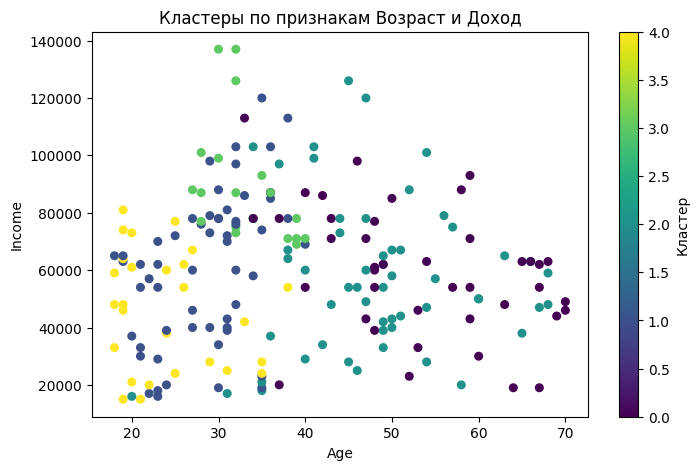

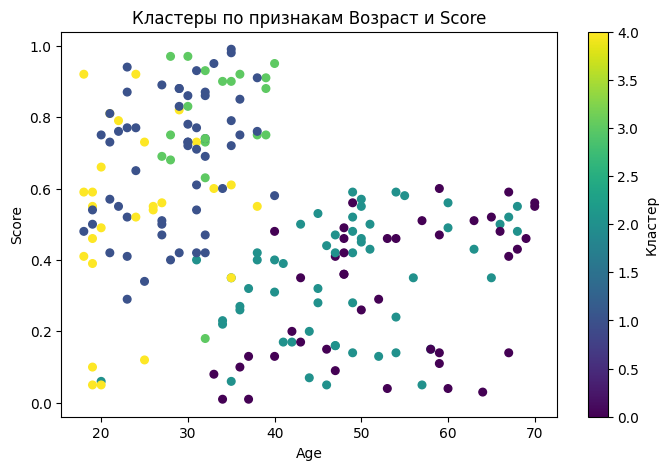

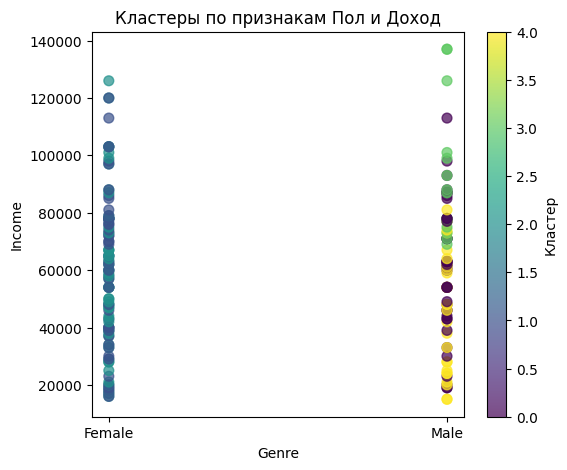

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

url = 'https://raw.githubusercontent.com/koroteevmv/ML_course/refs/heads/main/ML6.1%20clustering/data/mall_customers_clustering.csv'
df = pd.read_csv(url, index_col=0)
x = df.drop(["CustomerID"], axis=1)
X = pd.get_dummies(x)
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
k_means = KMeans(n_clusters=5, random_state=42).fit(X_scaled)
y_kmeans = k_means.labels_
df['cluster'] = y_kmeans



# 1) Age и Income
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Income'], c=df['cluster'], cmap='viridis', s=30)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Кластеры по признакам Возраст и Доход')
plt.colorbar(label='Кластер')
plt.show()

# 2) Age и Score
plt.figure(figsize=(8,5))
plt.scatter(df['Age'], df['Score'], c=df['cluster'], cmap='viridis', s=30)
plt.xlabel('Age')
plt.ylabel('Score')
plt.title('Кластеры по признакам Возраст и Score')
plt.colorbar(label='Кластер')
plt.show()

# 3) Genre и Income
genre_numeric = pd.get_dummies(df['Genre'], drop_first=True)['Male']
plt.figure(figsize=(6,5))
plt.scatter(genre_numeric, df['Income'], c=df['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.xticks([0,1], ['Female', 'Male'])
plt.xlabel('Genre')
plt.ylabel('Income')
plt.title('Кластеры по признакам Пол и Доход')
plt.colorbar(label='Кластер')
plt.show()

# Понижение размерности
**Цель работы**  
Ознакомиться с основными методами понижения размерности, изучить их применение на практике, сравнить эффективность разных методов и визуализировать результаты.

**Содержание работы**  
Загрузите прилагающийся датасет. Проверьте его на чистоту, подготовьте к моделированию.
Разбейте датасет на три кластера методом К-средних. Оцените качество кластеризации по метрике WCSS.
Визуализируйте результат кластеризации. Выведите центры кластеров.
Выберите оптимальное количество кластеров методом локтя. Визуализируйте получившуюся кластеризацию.
Постройте кластеризацию с 8 кластерами. Как располагаются их центры и что это значит?
Нормализуйте датасет и повторите кластеризацию.
Постройте для наглядности кластеризацию только по двум признакам.
Постройте на том же датасете иерархическую кластеризацию.
Постройте на этих же данных кластеризацию методом DBSCAN.

Сгенерируйте синтетический двумерный датасет с высокой степенью корреляции между признаками.

In [ ]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)
X = np.column_stack((x, y))

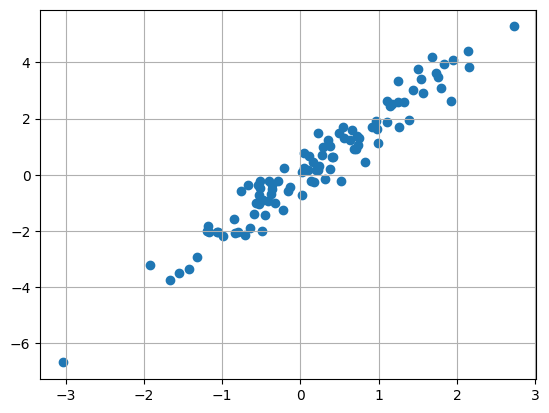

In [ ]:
plt.scatter(X[:, 0], X[:, 1])
plt.grid(True)
plt.show()

Понизьте размерность датасета до одной при помощи метода PCA и визуализируйте его до и после.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

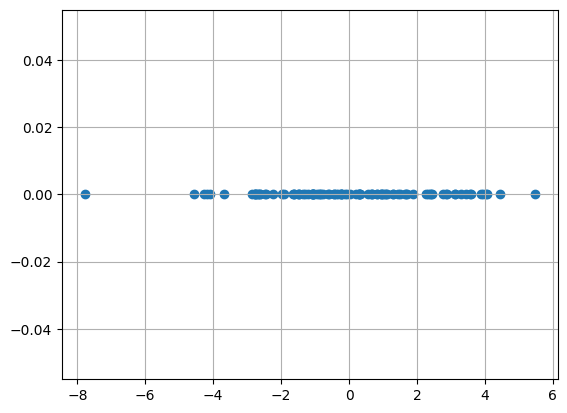

In [ ]:
plt.scatter(X_pca[:, 0], np.zeros_like(X_pca[:, 0]))
plt.grid(True)
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")
print(f"Объясненная дисперсия: {pca.explained_variance_ratio_}")

Главная компонента (направление): [[0.43447584 0.90068349]]
Объясненная дисперсия: [0.99064659]


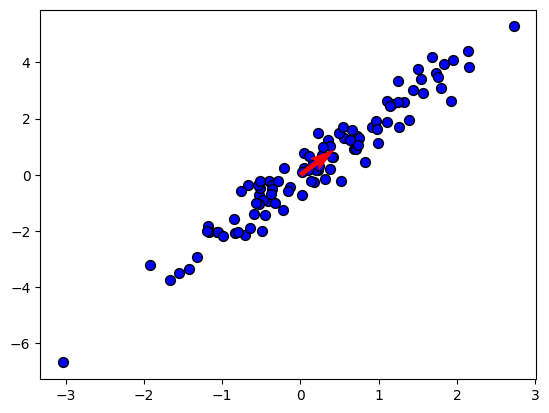

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c='blue', edgecolor='k', s=50)
pc1_direction = pca.components_[0]
plt.quiver(0, 0, pc1_direction[0], pc1_direction[1], angles='xy', scale_units='xy', scale=1, color='red', width=0.01)

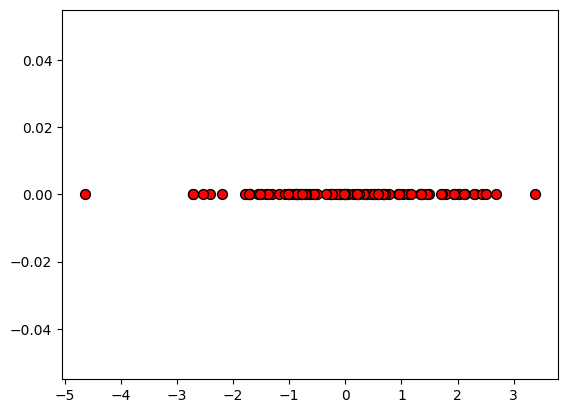

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

Примените метод главных компонент на более многомерных данных. Визуализируйте две главные компоненты.

In [ ]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

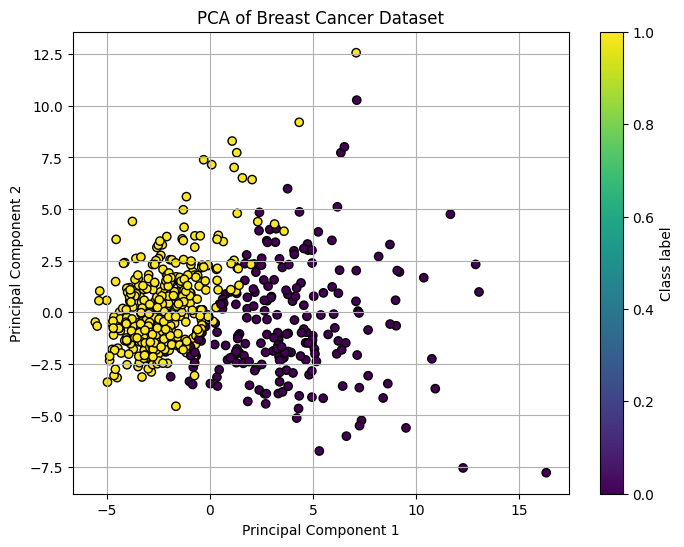

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Breast Cancer Dataset')
plt.colorbar(label='Class label')
plt.grid(True)
plt.show()

In [ ]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [ ]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


Алгоритм t-SNE является параметрическим. У него есть один главный гиперпараметр, который существенно влияет на работу алгоритма. Это так называемый perplexity - он влиет на то, какие структуры будут превалировать в анализе, крупномасштабные или мелкие.

In [ ]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

NameError: name 'TSNE' is not defined

<Figure size 1500x500 with 0 Axes>

Метод KernelPCA

Сгенерируйте линейно неразделимый двумерный датасет для классификации и опробуйте на нем метод KernelPCA с различными ядрами.

In [ ]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

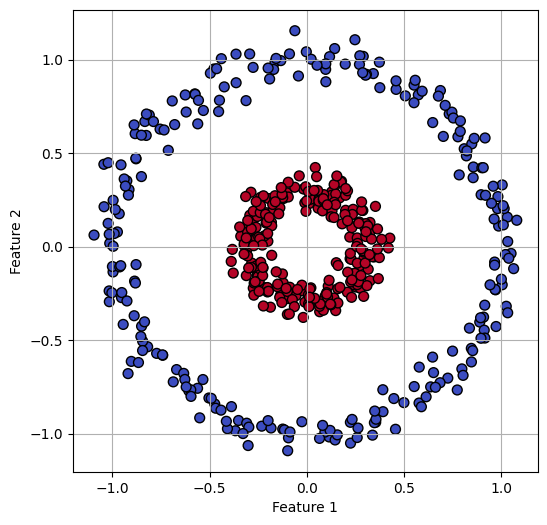

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

Ядерные функции работают в методе главных компонент примерно также, как и в методе опорных векторов. И ядерные функции используются такие же.

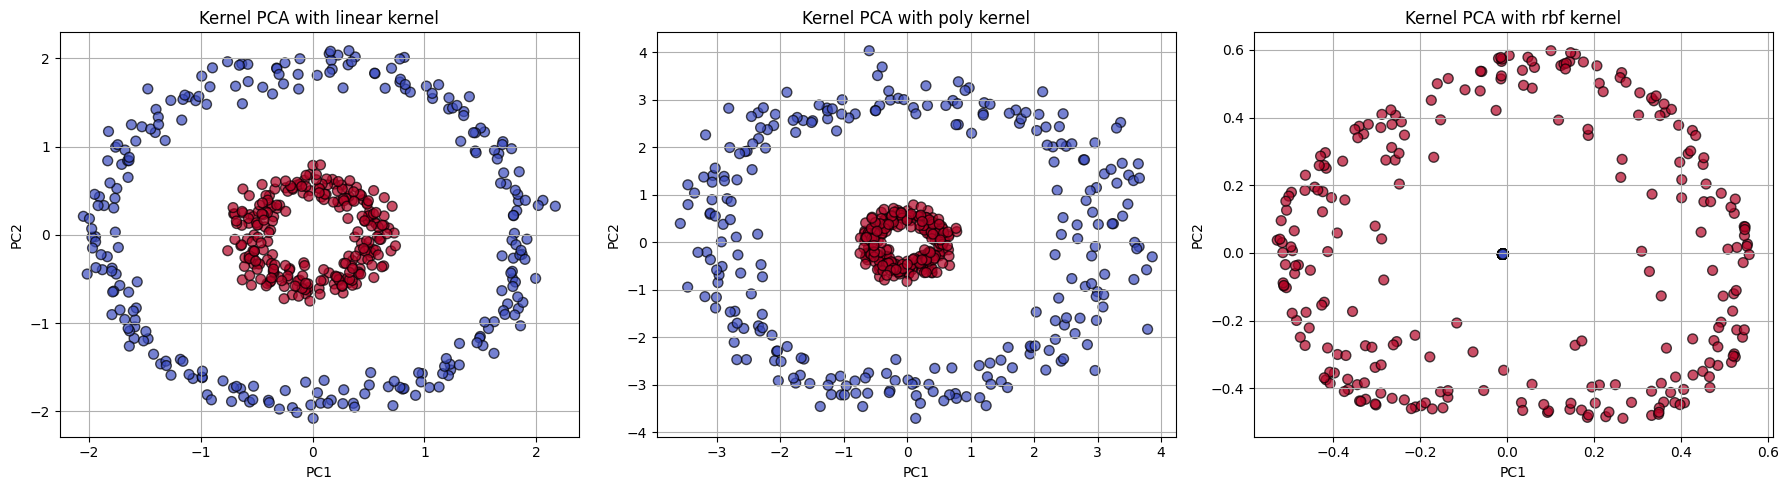

In [ ]:
from sklearn.decomposition import KernelPCA
kernels = ['linear', 'poly', 'rbf']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
plt.figure(figsize=(18, 5))
for i, kernel in enumerate(kernels, 1):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)
    plt.subplot(1, 3, i)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c=y, cmap='coolwarm', edgecolor='k', s=50, alpha=0.7)
    plt.title(f'Kernel PCA with {kernel} kernel')
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.grid(True)
plt.tight_layout()
plt.show()